In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import leastsq
import datetime
%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#Pre-process file
#filename = 'ArgonValidation_nt_B4_g.csv'
filename = '10cm_1e6_400GeV_RbAwake_cut1_5mm_nt_B4_g.csv'
t0 = datetime.datetime.now()
df = pd.read_csv('/Volumes/UNTITLED/'+filename,
                 skiprows=19,header=None,names=['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','stepLength','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName','fCluster'
                                                ])
"""
count1=0
list1=[]
print 'reading: elapsed '+str(datetime.datetime.now()-t0)
t0 = datetime.datetime.now()
for i in range(df.shape[0]):
    
    #if i%1000==0:
    #    print 'i= ' + str(i)
    if df.iloc[i]['processName']=='event':
        count1 +=1
    else:
        list1.append(count1)    

print 'processing: elapsed '+str(datetime.datetime.now()-t0)
"""

"\ncount1=0\nlist1=[]\nprint 'reading: elapsed '+str(datetime.datetime.now()-t0)\nt0 = datetime.datetime.now()\nfor i in range(df.shape[0]):\n    \n    #if i%1000==0:\n    #    print 'i= ' + str(i)\n    if df.iloc[i]['processName']=='event':\n        count1 +=1\n    else:\n        list1.append(count1)    \n\nprint 'processing: elapsed '+str(datetime.datetime.now()-t0)\n"

In [5]:
print filename
print df.head(), df.shape

10cm_1e6_400GeV_RbAwake_cut1_5mm_nt_B4_g.csv
   trackId  parentId volumeName particleName  stepNumber  posX  posY  posZ  \
0       99        99      event        event          99  99.9  99.9  99.9   
1       99        99      event        event          99  99.9  99.9  99.9   
2       99        99      event        event          99  99.9  99.9  99.9   
3       99        99      event        event          99  99.9  99.9  99.9   
4       99        99      event        event          99  99.9  99.9  99.9   

   perp  stepLength  kineeticEnergyDiff  edepStep  kineticEnergyPostStep  \
0  99.9        99.9                99.9      99.9                1.25848   
1  99.9        99.9                99.9      99.9                1.25848   
2  99.9        99.9                99.9      99.9                1.25848   
3  99.9        99.9                99.9      99.9                1.25848   
4  99.9        99.9                99.9      99.9                1.25848   

  processName  fCluster  
0  

In [ ]:
"""
df_events = df[df.processName=='event']
df_steps = df[df.processName!='event']

df_steps.insert(len(df_steps.columns),'particleId',np.array(list1))
"""
#print df_steps.particleName.unique()

In [ ]:
"""
NOT NECESSARY BECAUSE OF PRE-PROCESSING BEFORE
#reading data frame
#filename = 'testem8_nt_B4_g.csv'
#filename = 'B4_nt_B4_g_origin_processed.csv'
filename = 'ArgonValidation_nt_B4_g.csv'
#filename = 'argon_400geV_ntp.csv'
#df = pd.read_csv('/Users/gabrielfior/OneDrive/Master Thesis/Share_Ubuntu/'+filename,
#                 skiprows=7,header=None,names=['energyDeposited_ev','fClusters','whatever'])
df = pd.read_csv('/Volumes/UNTITLED/'+filename,
                 skiprows=19,header=None,names=['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','stepLength','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName','fCluster',
                                                'particleId'])
sf = graphlab.SFrame.read_csv('/Volumes/UNTITLED/'+filename,)    
#argon_400geV_ntp.csv
"""

In [ ]:
#df.head()

In [6]:
#df.head(40)

#df_events=df[df.processName=='event']
#df_steps_p = df_steps[(df_steps.particleName=='proton')]
#df_steps_e = df_steps[(df_steps.particleName=='e-')]

#df_steps_p = df[(df.particleName=='proton')]
#df_steps_e = df[(df.particleName=='e-')]


#del (df)
#print df.shape
#np.mean(df.energyDeposited_ev)
#df.energyDeposited_ev.unique()

In [11]:
#Group by stepNumber
#agg1 = {'edepStep':['sum'], 'stepNumber': ['max'], 'kineticEnergyPostStep':['min','max'],'fCluster':['sum']}
#df_grouped_p = df_steps_p.groupby('particleId',as_index=False,group_keys=False).agg(agg1)

#idx = df.groupby('word')['count'].idxmax()
#print df_steps_p.stepNumber
df.head(20)

,trackId,parentId,volumeName,particleName,stepNumber,posX,posY,posZ,perp,stepLength,kineeticEnergyDiff,edepStep,kineticEnergyPostStep,processName,fCluster
0,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
1,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
2,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
3,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
4,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
5,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
6,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
7,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
8,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0
9,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,1.25848,event,0


# Mean energy deposit by protons

1.32050872016


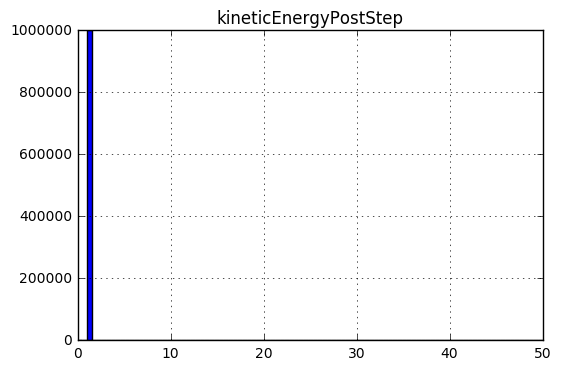

In [14]:
print (df.kineticEnergyPostStep.mean())
df.hist(['kineticEnergyPostStep'],bins=np.linspace(0,50,100))
plt.show()
#plt.hist(df_grouped_p,bins=np.linspace(0,7000,100))
#plt.title('Mean energy deposited by protons: ' + str(df_grouped_p.mean()))
#plt.show()

0.008685


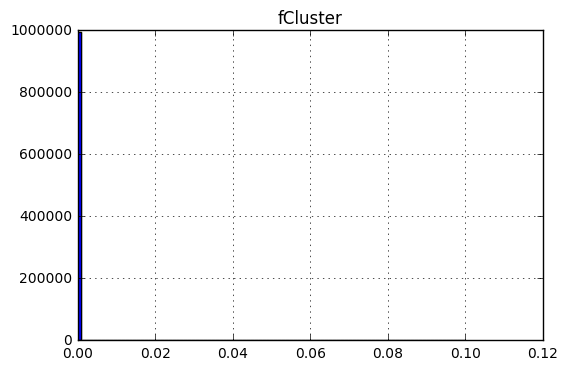

In [18]:
# Mean Clusters generated by proton

print (df['fCluster'].mean())
df.hist(['fCluster'],bins=np.linspace(0,0.1,100))
plt.show()


# Read Argon data

In [20]:
filename = '10cm_1e6_400GeV_Ar_cut1_5mm_nt_B4_g.csv'
t0 = datetime.datetime.now()
dfAr = pd.read_csv('/Volumes/UNTITLED/'+filename,
                 skiprows=19,header=None,names=['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','stepLength','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName','fCluster'
                                                ])

# Mean energy deposit, mean number of clusters

In [29]:
plt.hist()

,trackId,parentId,volumeName,particleName,stepNumber,posX,posY,posZ,perp,stepLength,kineeticEnergyDiff,edepStep,kineticEnergyPostStep,processName,fCluster
0,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,25325.8,event,979
1,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,23188.3,event,876
2,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,27899.7,event,1035
3,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,18891.2,event,729
4,99,99,event,event,99,99.9,99.9,99.9,99.9,99.9,99.9,99.9,27722.9,event,1047


28315.5114274
1076.503847


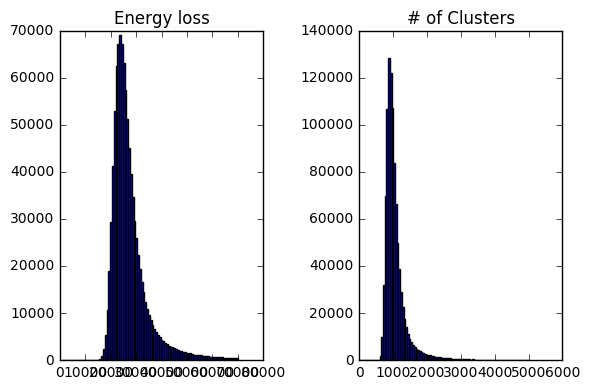

In [35]:
print (dfAr.kineticEnergyPostStep.mean())
print dfAr.fCluster.mean()
plt.subplot(121)
plt.hist(dfAr.kineticEnergyPostStep,bins=np.linspace(0,70000,100))
plt.title('Energy loss')
plt.subplot(122)
plt.hist(dfAr.fCluster,bins=np.linspace(0,5000,100))
plt.title('# of Clusters')
plt.tight_layout()
plt.show()
#plt.hist(df_grouped_p,bins=np.linspace(0,7000,100))
#plt.title('Mean energy deposited by protons: ' + str(df_grouped_p.mean()))
#plt.show()